## Création de votre premier réseau de neurones

Ce notebook permet de créer un premier réseau de neurone qui va classifier des données regroupées de différentes façon en s'inspirant de https://playground.tensorflow.org  
Entrainez-vous sur cette page dans un premier temps puis attaquez le code.


Le code ci-dessous est le code Python permettant de créer votre réseau avec 2 populations séparées (Gaussian)

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys
import random as rd

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Création des données d'entrainement

In [2]:
datas = []
labels = []
nbr_points = 10000

abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()


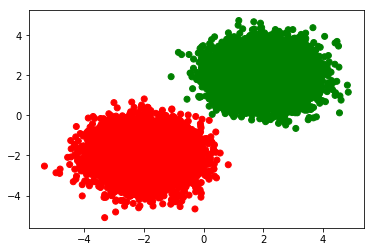

In [3]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.show()

In [4]:
datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
len(datas)
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)])

In [5]:
list(datas[0])+[labels[0]]

[-3.4508551342075267, -0.6876965883033448, 0.0]

In [6]:
df = pd.DataFrame(datas_df, columns=['abs','ord','couleur'])
df

abs                  ord couleur
0       -3.4508551342075267  -0.6876965883033448     red
1       -0.7774026499596767  -2.7736273204184196     red
2       -1.8817621276909315  -1.5910423932724096     red
3       -1.8397220295946555  -3.1106465806448793     red
4        -3.505181376683682  -1.0348707408317843     red
5       -2.6917622231284755  -2.3162296286121093     red
6        -3.300925016968088  -3.1214995761230204     red
7       -3.0097274056119225   -2.563460404423336     red
8       -2.0581402020617254  -1.8583152644868663     red
9       -1.8402111823004024   -2.240536499490385     red
10      -1.6589847293139952  -2.4423184550949903     red
11      -1.1510669861383946  -1.5421431521939741     red
12      -1.2382099954755705  -1.7385319642499009     red
13      -2.5099647552156927  -1.7264166441121234     red
14      -1.0330514757462632  -1.5835328282255707     red
15       -2.603983766121897  -1.3671603352111978     red
16      -2.6006763098203898  -1.4760208385782565     red
17      -3.2358170247411664  -2.4267559403585452     red
18      -1.9733955754812218   -1.716316842994534     red
19      -1.1340510733740854  -1.3323625053814832     red
20      -1.9994114628858077  -2.9377834221912655     red
21      -2.3087752547176565    -0.90575541491524     red
22      -0.4453916405231666  -1.9940206185580547     red
23      -1.6068385174746296  -2.1366385382356237     red
24      -1.6890848133713146  -0.9354794993787063     red
25       -1.972165820661696  -0.3948339381178363     red
26     -0.07589487411439944    -3.87976612974548     red
27      -2.7783157562303944  -1.6029612858349083     red
28      -0.9268248613074934  -3.0206894876173136     red
29      -2.3442640741961887   -1.662763128917529     red
...                     ...                  ...     ...
19970     1.626106658256353    2.603477790297026   green
19971    1.9828634925254358   1.9808072603875597   green
19972    2.0173891058979034   1.4375500041365932   green
19973     2.313455353452879   2.1514722643629294   green
19974    1.6084382089510276    1.554312015767683   green
19975    1.3415938198266537   1.5954054232036026   green
19976    2.3510076400075404   1.5614272879458704   green
19977    2.2601382510878976   1.6291133384180625   green
19978    1.3517559458378117  0.36277595125555084   green
19979      3.21684113355197   1.5872070917649945   green
19980    2.0263178804943793   1.7924591016843168   green
19981     2.808908605995142   0.4739181010659972   green
19982     1.560896960559946    2.121754737018267   green
19983     2.384105416288722    2.427043188376633   green
19984    1.6896638552421934   1.9070490436041523   green
19985    1.8356911317468931    2.403576221994726   green
19986     2.063061406989125    1.657225852480997   green
19987     2.361304646299285   1.0881894354306456   green
19988    0.9711098508724354    3.752841818910537   green
19989     2.484741764709644   2.4966906381025993   green
19990    2.3472647650659475    1.766746624379903   green
19991    2.3710833275989884   2.4500559500857406   green
19992     2.073623564708045    3.106432809640261   green
19993    2.2727673324094786    0.781173954517353   green
19994    1.9844491288477053   1.9253003692212984   green
19995     3.094339504615238   1.2220800429859908   green
19996    3.1153105442838323   1.9505748518837025   green
19997    2.7200324600320287   1.4114032476858986   green
19998    1.6901585067786924    1.167384633423867   green
19999    2.2225021030380097   1.9601556522586432   green

[20000 rows x 3 columns]

## Création du modèle

In [7]:
# model creation
model = tf.keras.models.Sequential()

### Ajout d'une couche de 2 neurones

In [8]:
# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

## Exemple de prédiction sans entraînement

In [9]:
# output example
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

Instructions for updating:
Colocations handled automatically by placer.
[[0.8959391  0.10406093]]
Found :  0
Should be :  0.0


## Résumé du modèle (couche de neurones)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [11]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [12]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

## Entraînement
On prend par exemple 20% de données de validation, et on entraine le modèle sur 10 epochs

In [13]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 1s 87us/sample - loss: 0.0891 - acc: 0.9792 - val_loss: 0.0269 - val_acc: 0.9998
Epoch 2/10
16000/16000 [==============================] - 1s 85us/sample - loss: 0.0167 - acc: 0.9998 - val_loss: 0.0152 - val_acc: 0.9998
Epoch 3/10
16000/16000 [==============================] - 1s 82us/sample - loss: 0.0107 - acc: 0.9999 - val_loss: 0.0110 - val_acc: 0.9998
Epoch 4/10
16000/16000 [==============================] - 1s 87us/sample - loss: 0.0081 - acc: 0.9999 - val_loss: 0.0087 - val_acc: 0.9998
Epoch 5/10
16000/16000 [==============================] - 1s 82us/sample - loss: 0.0066 - acc: 0.9999 - val_loss: 0.0073 - val_acc: 0.9998
Epoch 6/10
16000/16000 [==============================] - 1s 81us/sample - loss: 0.0057 - acc: 0.9999 - val_loss: 0.0064 - val_acc: 0.9998
Epoch 7/10
16000/16000 [==============================] - 1s 85us/sample - loss: 0.0050 - acc: 0.9999 - val_loss: 0.0

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

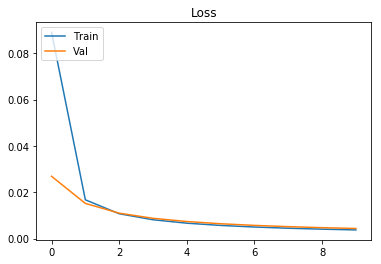

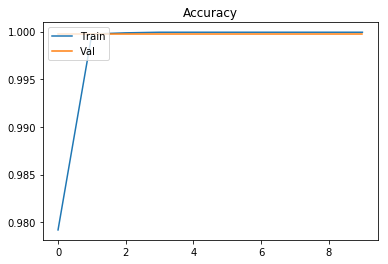

In [14]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## On réalise nos premières prédictions sur des exemples évidents

In [15]:
datas_tests = np.array([[2,2],[-2,-2]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c[index_max(list(el))])
    
res
    

[[5.5182684e-04 9.9944812e-01]
 [9.9963617e-01 3.6376168e-04]]


['green', 'red']

## Sur des exemples moins évidents 
## le modèle donne un résultat mais peu fiable 
## ce qui est normal puisque l'on se trouve aux limites du modèle

In [16]:
c2 = ['darkred','chartreuse']

datas_tests = np.array([[0,0],[2,-2],[4,-4]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c2[index_max(list(el))])
    
res

[[0.5519275  0.44807246]
 [0.15151095 0.84848905]
 [0.02523264 0.9747673 ]]


['darkred', 'chartreuse', 'chartreuse']

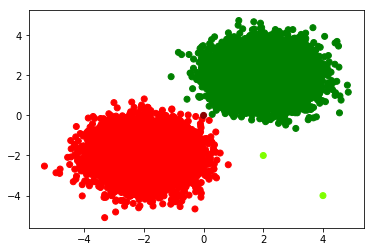

In [17]:
abstest = [ data[0] for data in datas_tests]
ordstest = [ data[1] for data in datas_tests]
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.scatter(abstest,ordstest, color = res)
plt.show()

### Exercice:

Créer un jeu de 2000 données de test comprenant datas et labels, pour tester le modèle précédent

In [18]:
# example
datas_test = np.array([[2,2],[-2,-2]])
labels_test = [1,0]

loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

2/2 [==============================] - 0s 535us/sample - loss: 4.5795e-04 - acc: 1.0000
Test Loss 0.00045795238111168146
Test Accuracy 1.0


[[5.5182684e-04 9.9944812e-01]
 [9.9963617e-01 3.6376168e-04]]


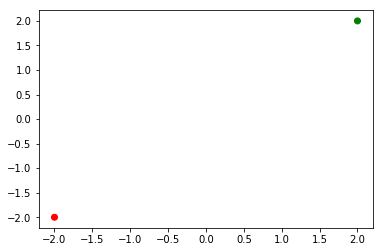

In [19]:

model_output = model.predict(datas_test)
print(model_output)
Colors = [c[index_max(list(model))] for model in model_output]

abstest = [ data[0] for data in datas_test]
ordstest = [ data[1] for data in datas_test]

plt.scatter(abstest,ordstest,color=Colors)

plt.show()


## -----------------------------------------------------------------------
## Création d'un second réseau de neurones

Le code ci-dessous est le code Python permettant de créer un réseau de neurones avec 2 populations séparées différemment (Exclusive Or)

### Essayons avec des données un peu moins bien réparties

## Création des données d'entraînement

In [20]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    if x*y >= 0:
        labels.append(0)
    else:
        labels.append(1)
        
datas = np.array(datas)

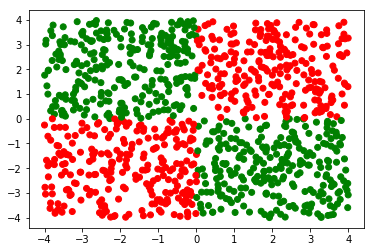

In [21]:
c = ['red','green']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

## Création du modèle

In [22]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones
Il va falloir ajouter une couche de neurones pour complexifier notre modèle, sinon on n'arrivera jamais à obtenir un résultat satisfaisant.

In [23]:
# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

## Exemple de prédiction sans entraînement

In [24]:
# output example
print(datas[0:1])
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", c[index_max(list(model_output[0]))])
print("Should be : ", c[labels[0:1][0]])

[[-1.99122767  0.62542174]]
[[0.8359655  0.16403452]]
Found :  red
Should be :  green


## Résumé du modèle (couches de neurones)

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  12        
_________________________________________________________________
dense_2 (Dense)              multiple                  10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [26]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [27]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 261us/sample - loss: 0.7594 - acc: 0.5575 - val_loss: 0.6903 - val_acc: 0.6200
Epoch 2/10
800/800 [==============================] - 0s 114us/sample - loss: 0.6464 - acc: 0.6562 - val_loss: 0.6093 - val_acc: 0.7450
Epoch 3/10
800/800 [==============================] - 0s 115us/sample - loss: 0.5852 - acc: 0.7600 - val_loss: 0.5664 - val_acc: 0.8150
Epoch 4/10
800/800 [==============================] - 0s 117us/sample - loss: 0.5485 - acc: 0.8175 - val_loss: 0.5384 - val_acc: 0.8350
Epoch 5/10
800/800 [==============================] - 0s 48us/sample - loss: 0.5236 - acc: 0.8500 - val_loss: 0.5191 - val_acc: 0.8650
Epoch 6/10
800/800 [==============================] - 0s 114us/sample - loss: 0.5044 - acc: 0.8637 - val_loss: 0.5027 - val_acc: 0.8550
Epoch 7/10
800/800 [==============================] - 0s 122us/sample - loss: 0.4876 - acc: 0.8750 - val_loss: 0.4884 - val_acc: 0.8550
Epo

## Le modèle est-il bien entraîné ?

In [28]:
datas_test = []
labels_test = []


nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    y = 8 * rd.random() - 4
    datas_test.append([x,y])
    if x*y >= 0:
        labels_test.append(0)
    else:
        labels_test.append(1)
        
datas_test = np.array(datas_test)

In [29]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

1000/1000 [==============================] - 0s 24us/sample - loss: 0.4387 - acc: 0.8720
Test Loss 0.4387330451011658
Test Accuracy 0.872


### Exercice: 
Le résultat n'est pas très satisfaisant. Proposez deux façons d'améliorer la prédiction.

## Troisième réseau de neurones

### sur un exemple encore plus tordu... avec 3 populations

## A vous de jouer

In [30]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels.append(0)
    elif norm_carre <= 8:
        labels.append(1)
    else:
        labels.append(2)
        
datas = np.array(datas)

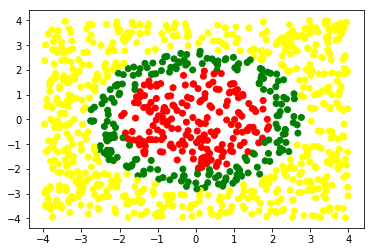

In [31]:
c = ['red','green','yellow']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

### Construire un réseau de neurones correspondant

In [32]:
# model creation
model3 = tf.keras.models.Sequential()

In [33]:
# Add the layers
model3.add(tf.keras.layers.Dense(4, activation="relu"))
model3.add(tf.keras.layers.Dense(2, activation="softmax"))  

In [40]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  12        
_________________________________________________________________
dense_4 (Dense)              multiple                  10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
model3.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [37]:
history3 = model3.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10


InvalidArgumentError: Received a label value of 2 which is outside the valid range of [0, 2).  Label values: 1 2 1 1 0 1 0 0 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 0 1 2 0 0 2 1 0
	 [[{{node loss_2/output_1_loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]

In [38]:
model3_output = model3.predict(datas_test)
print(model3_output)
Colors = [c[index_max(list(model))] for model3 in model3_output]

abstest = [ data[0] for data in datas_test]
ordstest = [ data[1] for data in datas_test]

plt.scatter(abstest,ordstest,color=Colors)

plt.show()

[[0.46437958 0.5356204 ]
 [0.47900122 0.5209988 ]
 [0.31559595 0.6844041 ]
 ...
 [0.5389591  0.46104097]
 [0.4812625  0.51873744]
 [0.31512475 0.68487525]]


TypeError: 'Sequential' object is not iterable